## 项目背景：
对于任何一家公司来讲，员工队伍的稳定性对于企业的发展都至关重要。之前马老师也说过，员工离职无非两个原因，其一是工资没有给到位，其二是员工干的不爽。所以员工离职预测的价值就愈发的凸显出来了，尤其对于HR部门，较早的预测可以帮助企业未雨绸缪，尽可能降低因为人员变动而给公司带来的损失。

### 本项目的目标：

读取员工离职数据集
初步的探索性分析
建立决策树模型
建立支持向量机模型
模型评估
项目总结

#### 读取数据

In [1]:
# 导入第三方库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
%matplotlib inline

In [2]:
# 读取数据
df = pd.read_csv('/Users/fangcheng/sklearn/项目三：员工离职率预测/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# 查看数据集的基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# 查看数据集的统计结果
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


平均工作满意度在61%左右
平均绩效在72%左右
平均参与项目的数量为3.8
平均每月工作时间为201小时
该公司员工平均工作年限为3.5年
2%的员工在过去5年内得到岗位上的晋升
该公司的离职率为24%

In [8]:
#查看数据集的大小
df.shape

(14999, 10)

In [9]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#### 初步探索性分析

<Axes: xlabel='left', ylabel='time_spend_company'>

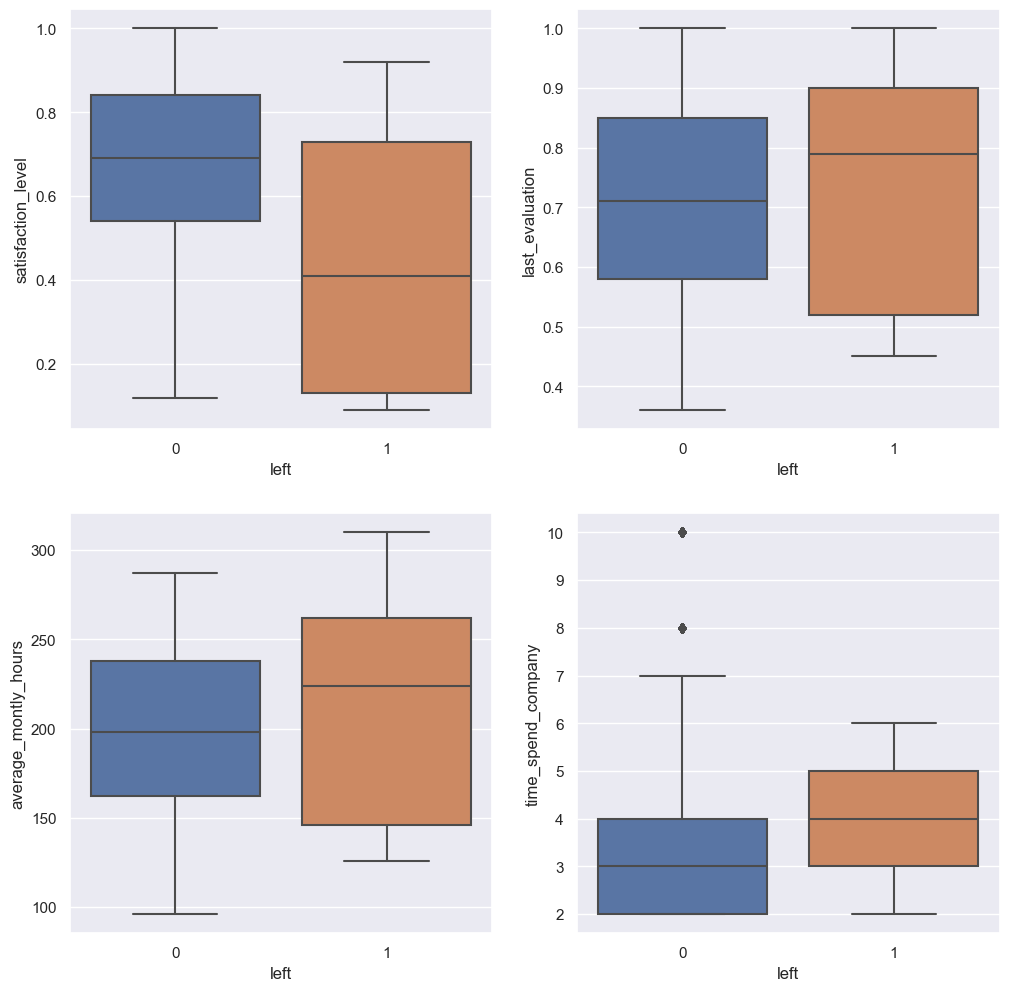

In [11]:
# 绘制箱形图，观察不同特征与离职之间的关系
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.boxplot(x='left',y='satisfaction_level',data=df)

plt.subplot(2,2,2)
sns.boxplot(x='left',y='last_evaluation',data=df)

plt.subplot(2,2,3)
sns.boxplot(x='left',y='average_montly_hours',data=df)

plt.subplot(2,2,4)
sns.boxplot(x='left',y='time_spend_company',data=df)

离职员工的工作满意度在40%左右，未离职员工的工作满意度在70%左右。
离职员工的绩效评估较高，在0.8左右。
离职员工的工作时长较长，在225小时左右。
离职员工的工作年限在4年左右。

<Axes: xlabel='number_project', ylabel='count'>

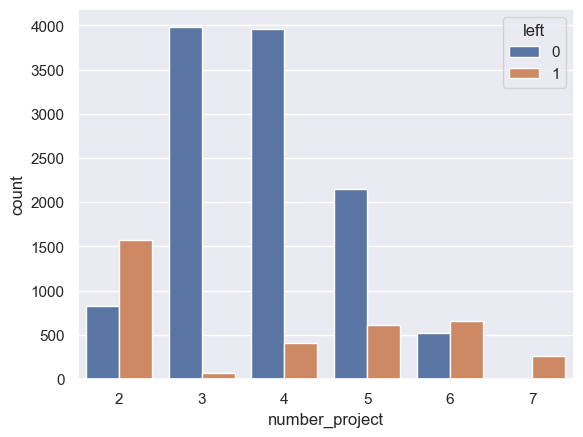

In [13]:
# 观察离职与参与项目的数量关系
sns.countplot(x='number_project',hue='left',data = df)

#### 建立决策树模型

In [14]:
# 查看字段类型
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [15]:
# 对类别变量进行处理
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [17]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [18]:
# 将类别数据转换成数值数据并替换原有的数据
department_map = {'sales':0, 'accounting':1, 'hr':2, 'technical':3, 'support':4, 'management':5,
       'IT':6, 'product_mng':7, 'marketing':8, 'RandD':9}
salary_map = {'low':0, 'medium':1, 'high':2}

df['department'] = df['department'].map(department_map)
df['salary'] = df['salary'].map(salary_map)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


对类别型变量最常用的处理方式是one_hot_encoding编码方式。上面我采用的是映射的方式，将每一个类别值都映射为一个单独的数字编码。但是这种做法也存在一个问题，将类别特征映射为1,2,3等数值，计算机会认为它们之间存在着相对的大小关系。所以推荐大家使用one_hot_encoding编码。

In [20]:
# 热独编码
df1 = df
df1 = pd.get_dummies(df1)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [21]:
# 切分训练集、测试集
label = df['left']
train = df.drop('left',axis = 1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,label,test_size = 0.3,random_state = 0)

In [22]:
# 导入决策树模型
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.9797777777777777

In [23]:
# 测试集的预测结果
y_pred = tree.predict(X_test)

In [24]:
# 打出混淆矩阵值
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred,labels=[0,1])

array([[3402,   60],
       [  31, 1007]])

In [25]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [27]:
#检查模型的各项评估指标
accuracy = (3402+1007)/(3402 + 60 + 31 +1007)
precision = 1007/(1007+31)
recall = 1007/(1007+60)
print(accuracy,precision,recall)

0.9797777777777777 0.9701348747591522 0.943767572633552


从三种评估指标可以看出，该树模型的效果还可以。
直接使用classification_report方法更加的方便，可以直接打印出recall,precision,f1-score值等。

#### 支持向量机SVM算法预测

In [32]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred,labels=[0,1])

array([[3462,    0],
       [ 944,   94]])

In [33]:
svc_accuracy = (3462 + 94)/(3462 + 94 +0 + 944)
svc_recall = 94/(94+944)
svc_precision = 94/(94+0)

print(svc_accuracy,svc_recall,svc_precision)

0.7902222222222223 0.0905587668593449 1.0


在SVC算法中，使用算法默认的参数，其recall值和精度都较低。将未离职的人预测为离职的有0人，将离职的预测为未离职的人有944人。

In [35]:
# 使用Gridsearch函数，对模型进行参数调优
import time
from sklearn.model_selection import GridSearchCV

clf = SVC()
param_grid = {'C':[0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10] }
grid = GridSearchCV(clf,param_grid = param_grid,cv = 3,n_jobs = -1,verbose = 2)
t1 = time.time()
grid.fit(X_train,y_train)
t2 = time.time()
print('The train time usage:{}'.format(round((t2-t1),3)))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
The train time usage:18.56


In [36]:
print(grid.best_score_)
print(grid.best_params_)

0.9584724070822955
{'C': 100, 'gamma': 0.01}


In [37]:
#采用最优的参数再次构建SVC模型

svc = SVC(C = 100,gamma = 0.01)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

In [38]:
confusion_matrix(y_test,y_pred,labels = [0,1])

array([[3374,   88],
       [  82,  956]])

In [39]:
accuracy = (3374+956)/(3374 + 88 + 82 + 956)
recall = 956/(956+82)
precision = 979/(956+88)
print(accuracy,recall,precision)

0.9622222222222222 0.9210019267822736 0.9377394636015326


通过参数调整，SVC模型的预测准确度较原始模型有了较大的提升。

In [40]:
#展示决策树和支持向量机算法的预测结果

result = {'Decisiontree':[0.9786,0.9730,0.9369],'SVC':[0.9622,0.9210,0.9377]}
pd.DataFrame(result,index = ['accuracy','recall','precision'])

,Decisiontree,SVC
accuracy,0.9786,0.9622
recall,0.9730,0.9210
precision,0.9369,0.9377


[CV] END .................................C=0.01, gamma=0.01; total time=   1.2s
[CV] END ....................................C=0.01, gamma=1; total time=   2.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.6s
[CV] END ....................................C=0.1, gamma=10; total time=   2.4s
[CV] END ......................................C=1, gamma=10; total time=   2.6s
[CV] END ....................................C=10, gamma=0.1; total time=   0.9s
[CV] END .................................C=100, gamma=0.001; total time=   0.7s
[CV] END .................................C=100, gamma=0.001; total time=   0.7s
[CV] END ..................................C=100, gamma=0.01; total time=   0.8s
[CV] END ...................................C=100, gamma=0.1; total time=   0.8s
[CV] END .................................C=0.01, gamma=0.01; total time=   1.3s
[CV] END ...................................C=0.01, gamma=10; total time=   2.2s
[CV] END ...................

#### 项目总结

1.理解数据，理解数据集中每个特征的实际意义。
2.探索性分析，理解影响因素与最终结果之间的关系，做到心中有数。此处定性的分析，也只能表达其相关性。
3.建立决策树模型和支持向量机模型，其中支持向量机模型涉及到了参数优化。通过accuracy,recall,precision评估两个模型的效果。
4.通过对比两个模型的效果，最终选择决策树算法。原因有两点，决策树算法简单，计算效率高，可解释性非常好。